## **The Sparks** **Foundation**

**Task-1 -
Predict the percentage of an student based on the no. of study hours.** 

### prediction using supervised learning

### **Author : Jahanvi Chawla**

In [30]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

In [31]:
#reading the data
url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [32]:
# Check if there any null value in the Dataset
df.isnull == True

False

There is no null value. So, we can proceed to visualize the data

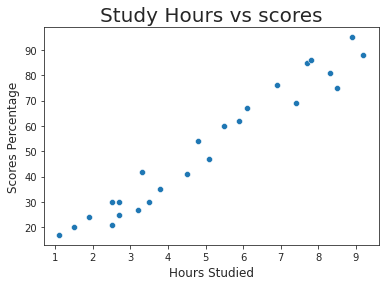

In [33]:
sns.set_style('ticks')
sns.scatterplot(x=df['Hours'], y=df['Scores'], data=df)
plt.title('Study Hours vs scores',size=20)
plt.ylabel('Scores Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()



It is showing the postively increase in scores percentage as number of hours studied increases

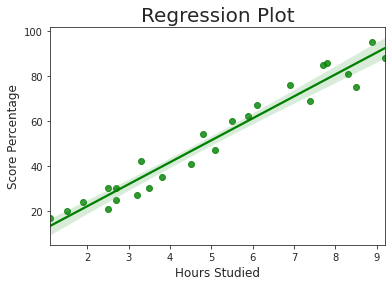

In [34]:
#regression plot
sns.regplot(x= df['Hours'], y= df['Scores'],color='g')
plt.title('Regression Plot',size=20)
plt.ylabel('Score Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

In [35]:
#to check the correlation
print(df.corr())

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


it shows +ve correlation between x and y

### **Training the model**

**splitting the data**

In [36]:
# Defining X and y from the Data
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, Y, random_state = 0)

**train the data**

In [37]:
regressor = LinearRegression()  
regressor.fit(train_X, train_y) 

print("Training complete.")

Training complete.


**predicting the percentage of marks**

In [38]:
pred_y = regressor.predict(val_X)

In [39]:
# Comparing Actual vs Predicted
df_train = pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})  
df_train

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


**visually compare the actual vs predicted**

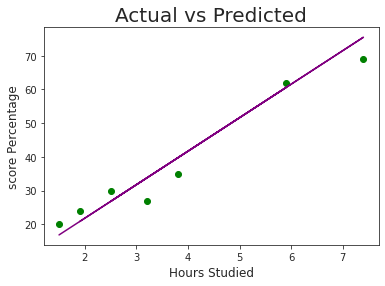

In [40]:
plt.scatter(x=val_X, y=val_y, color='green')
plt.plot(val_X, pred_y, color='Purple')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('score Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()


<function matplotlib.pyplot.show>

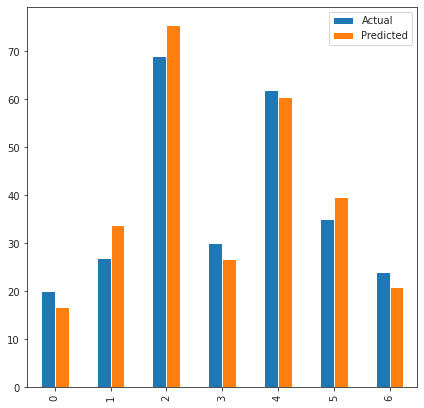

In [41]:
#bar chart for explanation of actual vs predicted
df_train.plot(kind='bar',figsize=(7,7))
plt.show

### **What will be the predicted score of a student if he/she studies for 9.25 hrs/ day?**

In [42]:
hours = [9.25]
ans = regressor.predict([hours])
print("Predicted Score = {}".format(ans[0]))

Predicted Score = 93.89272889341652


According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks.

## Evaluating model

In [44]:
# Calculating the accuracy of the model
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))
print('variance score: ',metrics.explained_variance_score(val_y,pred_y))

Mean absolute error:  4.130879918502482
variance score:  0.9398737229250632


This step is for evaluating the performance of algorithm